# Initializing Bok Choy for Image Processing

This script initializes a **BokChoy** object for processing an image.

### Steps:
1. **Define Image Source**:  
   - Sets `test_src` to the path of the image to be analyzed.
2. **Initialize BokChoy**:  
   - By default, `use_overlapping=False`, meaning only isolated crystals and clusters are detected.
   - Set `use_overlapping=True` to enable detection of **overlapping crystals**.
3. **Output Object**:  
   - Displays the `BokChoy` instance, which can be used for further image processing.


In [1]:
from bok_choy import BokChoy

In [2]:
test_src = 'examples/images/EXP1_EVOS_20X_031.tif'
bok_choy = BokChoy(test_src, use_overlapping=True)

### Saving Analysis Results to a File

In [3]:
bok_choy.save_results_summary_to_csv('results_summary.csv')
bok_choy.save_results_to_csv('results.csv')

Saved Bok Choy Summary results to results_summary.csv
Saved Bok Choy results to results.csv


### Display a Summary of the Results

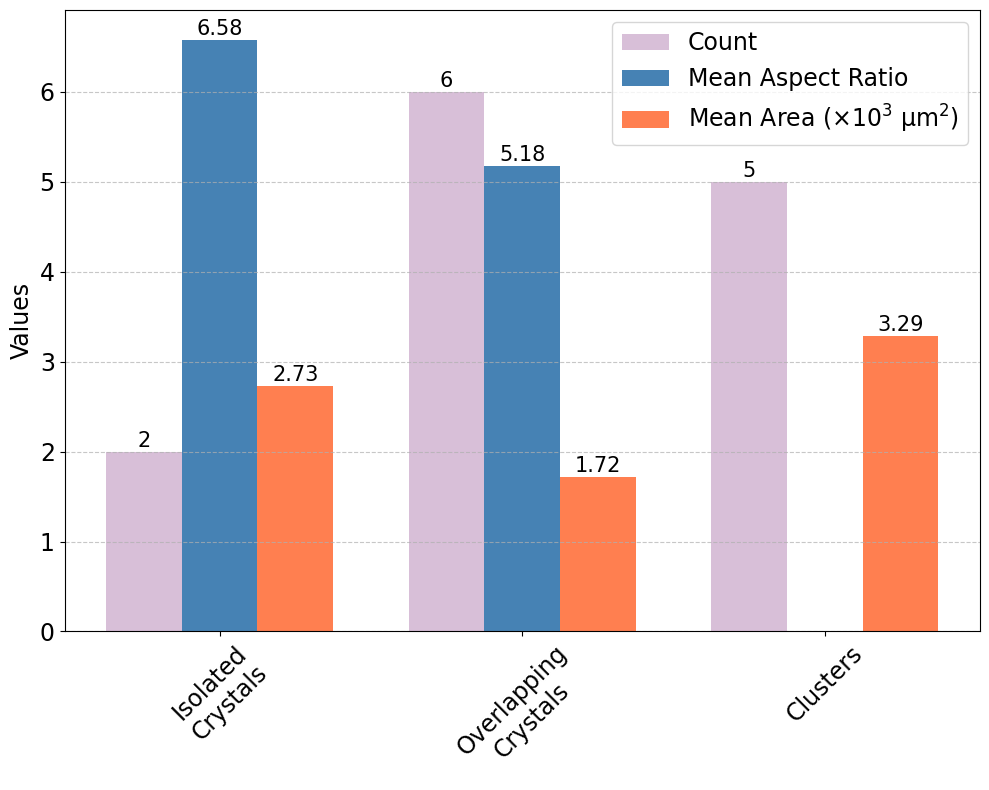

In [4]:
bok_choy.display_summary_chart()

# Accessing BokChoy Configuration

This script retrieves the **configuration settings** of the `BokChoy` instance.

### Steps:
1. **Initialize BokChoy**:  
   - The `BokChoy` object is created with the specified image source.
2. **Access Configuration**:  
   - `bok_choy.config` provides the **internal settings** and parameters used for image processing.

In [5]:
bok_choy.config

{'display_all_contour_debug': False,
 'display_rc_thresholding': False,
 'display_detected_contours': False,
 'display_detected_contours_on_original_image': False,
 'display_classified_contours': False,
 'display_all_blue_contours': False,
 'display_area_histogram_for_blue_contours': False,
 'display_detected_isolated_crystals': False,
 'display_detected_all_filtered_red_contours': False,
 'display_detected_clusters': False,
 'OC_display_grouped_lines': False,
 'OC_display_detected_overlapping_crystals': False,
 'OC_display_detected_clusters': False,
 'display_summary_chart': False}

# Configuring BokChoy for Contour Debugging

This script modifies the **BokChoy** configuration to enable visualization of detected contours and then displays them.

### Steps:
1. **Enable Contour Display from `display_plots.json`**:  
   - Examples: Sets `bok_choy.config['display_detected_isolated_crystals'] = True`, enabling visualization of isolated crystal contours.

3. **Display Debug Information**:  
   - Calls `bok_choy.display_contours_debug()` to visualize the detected contours.

[DEBUG] Active Visualization Configurations: {'display_detected_isolated_crystals': True}


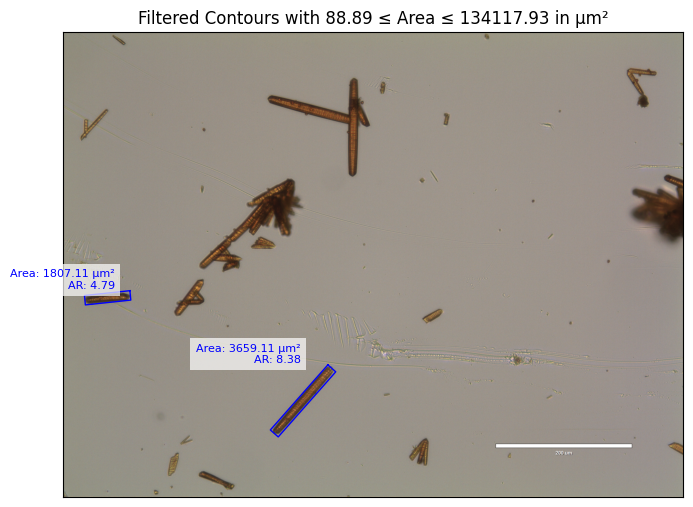

In [6]:
bok_choy.config['display_detected_isolated_crystals'] = True
# bok_choy.config['OC_display_detected_overlapping_crystals'] = True
# bok_choy.config['OC_display_detected_clusters'] = True

bok_choy.display_contours_debug()